# Exploring the Data
## Part 1 - Creating Columns to Help Summarize Data

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk
import spacy
from collections import Counter
import re
# nltk.download('stopwords')
# nltk.download('punkt')
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
%matplotlib inline

In [2]:
# Load Data of interest
load_data = pd.read_csv('info_672.csv')
load_data

# If you need to append extra rows to a data frame with the same columns, use .append
# combined = firsthalf.append(secondhalf, ignore_index = True)
# combined

,job_title,location,job_key,job_descriptions,company_name,ceo,founded,size,revenue,industry
0,Sustainability Intern,Remote,f5438de8a8e1629a,About Imperfect\nImperfect Foods was founded i...,Imperfect Foods,Philip Behn,2015,"1001 to 5,000",less than $1M (USD),Manufacturing
1,Environmental Sustainability Internship,"Providence, RI",7075a3a7b5571059,About: Jellyfish is a newly founded venture t...,Jellyfish,-1,2005,51 to 200,$5M to $25M (USD),Restaurants & Food Service
2,SUSTAINABILITY ANALYST,"Austin, TX",2171570f88a3a65d,"Austin, USA\nLongevity Partners is a boutique ...",LONGEVITY PARTNERS,-1,-1,11 to 50,-1,-1
3,Sustainability Innovation Consultant,Remote,e862369e52ce2651,"7+ years of experience in consulting, solution...","Amazon Web Services, Inc.",-1,-1,-1,-1,Information Technology
4,Sustainability Associate,"Louisville, KY",00a0e465fe8342c8,Schneider Electric™ creates connected technolo...,Schneider Electric,Jean-Pascal Tricoire,-1,"more than 10,000",more than $10B (USD),"Energy, Mining & Utilities"
...,...,...,...,...,...,...,...,...,...,...
668,Staff Sustainability Strategy & Disclosure Con...,"Washington, DC 20036 (Downtown area)",037f3323b9192c81,ERM is seeking a motivated and dynamic Sustain...,ERM Group,-1,1971,"1001 to 5,000",$100M to $500M (USD),HR Consulting
669,ESG and Sustainability Manager,"Denver, CO",cf4d4f9e0009297a,"Discover your full potential. At Tetra Tech, w...",Tetra Tech,Dan L. Batrack,1966,"more than 10,000",$1B to $5B (USD),Architectural & Engineering Services
670,"Manager, Sustainability","Omaha, NE",cc7e05bf63d6cb1d,Department FMP-Administration 50000761 Busines...,University of Nebraska Medical Center,-1,1995,"5,001 to 10,000",$100M to $500M (USD),Education
671,"Associate Consultant, Sustainability & Social ...","New York, NY 10010 (Flatiron District area)",cf188c93641c2e26,APCO Impact is a unique consultancy that takes...,APCO Worldwide,-1,1984,"501 to 1,000",$25M to $100M (USD),Media & Communication


In [3]:
# cleaning up the job title
#job_title - Title, get rid of parentheses. Sustainability in title, yes or no?
load_data['job_title_edit'] = load_data['job_title'].apply(lambda x: re.findall("^[^\(]+",x.title())[0])

#Add column identifying if sustainability in title.
load_data['sust_title'] = load_data['job_title'].apply(lambda x: "Yes" if 'sustainability' in x.lower() else "No")

load_data[load_data['sust_title'] == 'Yes']['job_title_edit'] 
#there are 237 job titles with sustainability in them

0                                  Sustainability Intern
1                Environmental Sustainability Internship
2                                 Sustainability Analyst
3                   Sustainability Innovation Consultant
4                               Sustainability Associate
                             ...                        
668    Staff Sustainability Strategy & Disclosure Con...
669                       Esg And Sustainability Manager
670                              Manager, Sustainability
671    Associate Consultant, Sustainability & Social ...
672    Environmental Stewardship & Sustainability Ana...
Name: job_title_edit, Length: 237, dtype: object

In [6]:
# cleaning up location - Boil it down to State and "Remote"

#https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
us_state_abbrev['New York State'] = 'NY'
us_state_abbrev['Washington State'] = 'WA'
us_state_abbrev['United States'] = 'n/a'

# create new column 'location_edit'
# populate with remote, the state ID or n/a if it can't identify state id
load_data['location_edit'] = ["Remote" if (x.lower() == 'remote') else ((re.findall("[A-Z]{2}", x)[0]) if len(re.findall("[A-Z]{2}", x)) != 0 else 'n/a') for x in load_data['location']]

#there are locations that are not a state ID or remote. need to change those to N/A or convert to state
for x in range(len(load_data)):
    if len(load_data.loc[x,'location_edit']) != 2 and load_data.loc[x,'location_edit'] != 'Remote':
        load_data.loc[x,'location_edit'] = us_state_abbrev[load_data.loc[x,'location']]

In [7]:
load_data['location_edit'].unique()

array(['Remote', 'RI', 'TX', 'KY', 'DC', 'GA', 'NY', 'CA', 'IA', 'WA',
       'AZ', 'IL', 'NC', 'MA', 'OK', 'VA', 'NJ', 'MI', 'AR', 'OH', 'UT',
       'FL', 'MD', 'MN', 'MO', 'n/a', 'ND', 'ME', 'CO', 'PA', 'OR', 'SC',
       'IN', 'GU', 'TN', 'MT', 'ID', 'CT', 'WI', 'NV', 'NM', 'NE', 'AL',
       'NH', 'SD', 'VT', 'WY', 'DE', 'HI', 'LA'], dtype=object)

In [8]:
#job_descriptions

#Add column identifying if sustainability in description
load_data['sust_desc'] = load_data['job_descriptions'].apply(lambda x: 'Yes' if 'sustainability' in x.lower() else 'No')


In [9]:
#company_name (title format)
load_data['company_name'] = load_data['company_name'].apply(lambda x: x.title())

In [10]:
#size categorize into = very small, small, medium, large, very large company
#-1 - n/a
#less than 10 - very small
#11 to 50 - small
#51 to 200 - medium
#201 to 500 - medium
#501 to 1000 - large
#1001 to 5000 - large
#5001 to 10000 - very large
#more than 10000 - very large

sizemap = {
    '1001 to 5,000': 'large',
    '51 to 200': 'medium',
    '11 to 50': 'small', 
    '-1': 'n/a', 
    'more than 10,000': 'very large',
    '501 to 1,000': 'large', 
    '5,001 to 10,000': 'very large', 
    '201 to 500': 'medium', 
    'less than 10': 'very small'
}

load_data['size'].unique()
load_data['size_category'] = [sizemap[x] for x in load_data['size']]

In [11]:
#revenue = divide into bigger brackets
#-1 - n/a
#less than $1M
#1M to 100M
#100M to 1B
#1B to 10B
#more than 10B
revmap = {
    'less than $1M (USD)': 'Less than \\$1M', 
    '$5M to $25M (USD)': '\\$1M to \\$100M', 
    '-1' :'n/a',
    'more than $10B (USD)': 'More than \\$10B', 
    '$25M to $100M (USD)': '\\$1M to \\$100M', 
    '$1B to $5B (USD)' : '\\$1B to \\$10B',
    '$5B to $10B (USD)': '\\$1B to \\$10B', 
    '$1M to $5M (USD)':  '\\$1M to \\$100M', 
    '$100M to $500M (USD)': '\\$100M to \\$1B',
    '$500M to $1B (USD)': '\\$100M to \\$1B'
}

load_data['revenue'].unique()
load_data['rev_category'] = [revmap[x] for x in load_data['revenue']]

In [12]:
load_data

,job_title,location,job_key,job_descriptions,company_name,ceo,founded,size,revenue,industry,job_title_edit,sust_title,location_edit,sust_desc,size_category,rev_category
0,Sustainability Intern,Remote,f5438de8a8e1629a,About Imperfect\nImperfect Foods was founded i...,Imperfect Foods,Philip Behn,2015,"1001 to 5,000",less than $1M (USD),Manufacturing,Sustainability Intern,Yes,Remote,Yes,large,Less than \$1M
1,Environmental Sustainability Internship,"Providence, RI",7075a3a7b5571059,About: Jellyfish is a newly founded venture t...,Jellyfish,-1,2005,51 to 200,$5M to $25M (USD),Restaurants & Food Service,Environmental Sustainability Internship,Yes,RI,Yes,medium,\$1M to \$100M
2,SUSTAINABILITY ANALYST,"Austin, TX",2171570f88a3a65d,"Austin, USA\nLongevity Partners is a boutique ...",Longevity Partners,-1,-1,11 to 50,-1,-1,Sustainability Analyst,Yes,TX,Yes,small,n/a
3,Sustainability Innovation Consultant,Remote,e862369e52ce2651,"7+ years of experience in consulting, solution...","Amazon Web Services, Inc.",-1,-1,-1,-1,Information Technology,Sustainability Innovation Consultant,Yes,Remote,Yes,n/a,n/a
4,Sustainability Associate,"Louisville, KY",00a0e465fe8342c8,Schneider Electric™ creates connected technolo...,Schneider Electric,Jean-Pascal Tricoire,-1,"more than 10,000",more than $10B (USD),"Energy, Mining & Utilities",Sustainability Associate,Yes,KY,Yes,very large,More than \$10B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Staff Sustainability Strategy & Disclosure Con...,"Washington, DC 20036 (Downtown area)",037f3323b9192c81,ERM is seeking a motivated and dynamic Sustain...,Erm Group,-1,1971,"1001 to 5,000",$100M to $500M (USD),HR Consulting,Staff Sustainability Strategy & Disclosure Con...,Yes,DC,Yes,large,\$100M to \$1B
669,ESG and Sustainability Manager,"Denver, CO",cf4d4f9e0009297a,"Discover your full potential. At Tetra Tech, w...",Tetra Tech,Dan L. Batrack,1966,"more than 10,000",$1B to $5B (USD),Architectural & Engineering Services,Esg And Sustainability Manager,Yes,CO,Yes,very large,\$1B to \$10B
670,"Manager, Sustainability","Omaha, NE",cc7e05bf63d6cb1d,Department FMP-Administration 50000761 Busines...,University Of Nebraska Medical Center,-1,1995,"5,001 to 10,000",$100M to $500M (USD),Education,"Manager, Sustainability",Yes,NE,Yes,very large,\$100M to \$1B
671,"Associate Consultant, Sustainability & Social ...","New York, NY 10010 (Flatiron District area)",cf188c93641c2e26,APCO Impact is a unique consultancy that takes...,Apco Worldwide,-1,1984,"501 to 1,000",$25M to $100M (USD),Media & Communication,"Associate Consultant, Sustainability & Social ...",Yes,NY,Yes,large,\$1M to \$100M


## Step 2 - Getting to know the data

In [13]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         673 non-null    object
 1   location          673 non-null    object
 2   job_key           673 non-null    object
 3   job_descriptions  673 non-null    object
 4   company_name      673 non-null    object
 5   ceo               673 non-null    object
 6   founded           673 non-null    int64 
 7   size              673 non-null    object
 8   revenue           673 non-null    object
 9   industry          673 non-null    object
 10  job_title_edit    673 non-null    object
 11  sust_title        673 non-null    object
 12  location_edit     673 non-null    object
 13  sust_desc         673 non-null    object
 14  size_category     673 non-null    object
 15  rev_category      673 non-null    object
dtypes: int64(1), object(15)
memory usage: 84.2+ KB


In [14]:
#How many of the jobs that we pulled have "sustainability" in the title?

load_data['sust_title'].value_counts()
#We got 673 jobs total
#237 have the word 'sustainability' in them
#436 don't

No     436
Yes    237
Name: sust_title, dtype: int64

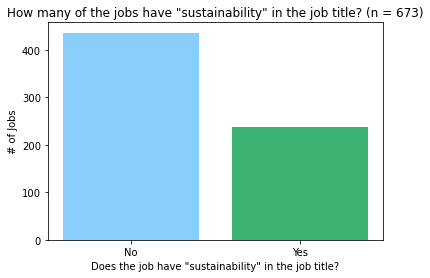

In [15]:
load_data.sust_title
x = load_data.sust_title.value_counts().index
y = load_data.sust_title.value_counts().values

plt.title('How many of the jobs have "sustainability" in the job title? (n = 673)')
plt.xlabel('Does the job have "sustainability" in the job title?')
plt.ylabel('# of Jobs')

plt.bar(x,y, color = ['lightskyblue','mediumseagreen'])
plt.show()

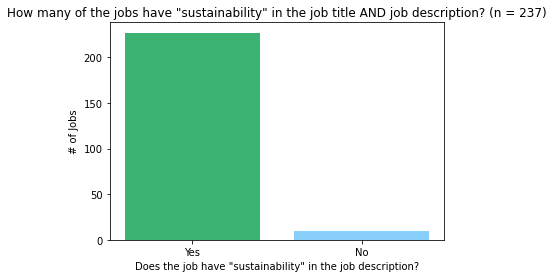

In [16]:
#Of the jobs that do have sustainability in their title (n=223), how many also had 'sustainability' in their job descriptions?
load_data[(load_data['sust_title'] == 'Yes') & (load_data['sust_desc'] == 'Yes')] #237 had it in the job description also
x = load_data[(load_data['sust_title'] == 'Yes')].sust_desc.value_counts().index
y = load_data[(load_data['sust_title'] == 'Yes')].sust_desc.value_counts().values

plt.title('How many of the jobs have "sustainability" in the job title AND job description? (n = 237)')
plt.xlabel('Does the job have "sustainability" in the job description?')
plt.ylabel('# of Jobs')

plt.bar(x,y, color = ['mediumseagreen','lightskyblue'])
plt.show()

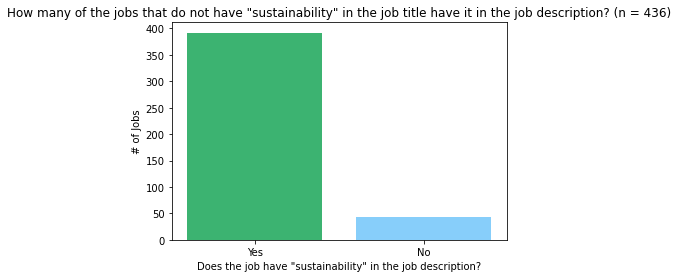

In [17]:
#Of the jobs that do NOT have sustainability in their title (n=435), how many had 'sustainability' in their job descriptions?
x = load_data[(load_data['sust_title'] == 'No')].sust_desc.value_counts().index
y = load_data[(load_data['sust_title'] == 'No')].sust_desc.value_counts().values

plt.title('How many of the jobs that do not have "sustainability" in the job title have it in the job description? (n = 436)')
plt.xlabel('Does the job have "sustainability" in the job description?')
plt.ylabel('# of Jobs')

plt.bar(x,y, color = ['mediumseagreen','lightskyblue'])
plt.show()

In [18]:
#Questionable 44 jobs that do not have 'sustainability' in the title or the job
len(load_data[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No')] )

44

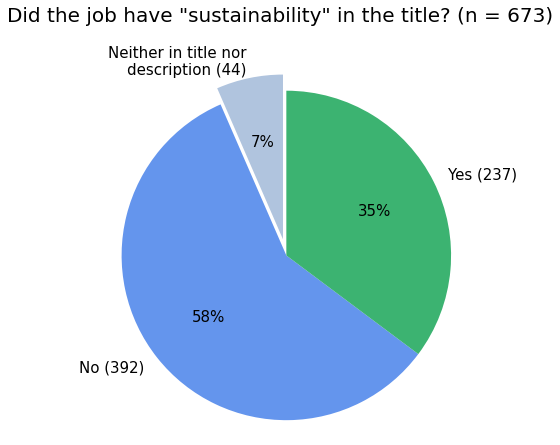

In [19]:
total = len(load_data['sust_title'])

yestitle = len(load_data[(load_data['sust_title'] == 'Yes')]) * 100 / total
# both = len(load_data[(load_data['sust_title'] == 'Yes') & (load_data['sust_desc'] == 'Yes')] ) * 100 / total
onlyt = len(load_data[(load_data['sust_title'] == 'Yes') & (load_data['sust_desc'] == 'No')] ) * 100 / total
onlyd = len(load_data[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'Yes')] ) * 100 / total
neither = len(load_data[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No')] ) * 100 / total
labels = ["Neither in title nor\ndescription (44)", "No (392)","Yes (237)"]
sizes = [neither,  onlyd,yestitle]
explode = (0.1, 0, 0)
colors = ["lightsteelblue", "cornflowerblue","mediumseagreen"]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,7))
plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.0f%%', startangle = 90)
# plt.title('subtitle', fontsize= 10)
plt.axis('equal')
plt.suptitle('Did the job have "sustainability" in the title? (n = 673)', fontsize = 20)
plt.show()

#### Key Takeaways
 - Total jobs scraped = 673
 - 237 of them had 'sustainability' in their job title
 - 436 of them did not have 'sustainability' in the job title, but a majority (392) did have it in the job description
 - 44 of them that did not have 'sustainability' in the job title or the job description

## Step 3 - Exploring the Data

In [20]:
## what is the difference between the job titles with sustainability and those without?

# difference in frequent job titles?
def frequent_words(theSeries, notWords = [], number = 10):
    '''
    nlp uses en_core_web_sm library
    input:
        theSeries = series you want to analyze frequence words of
        notWords = array of words you don't want to include in frequent word analysis; default = []
        number = # of frequent words wanted; default = 10
    output:
        list of tuples, word and count
    '''
    nlp = spacy.load('en_core_web_sm')
    jobs = ' '.join(theSeries.values)
    doc = nlp(jobs)
    
    # all tokens that arent punctuations and not in notWords
    words = [token.text
             for token in doc
             if not token.is_punct and token.text.lower() not in notWords]

    word_freq = Counter(words)
    print(f'\nNumber of rows included in analysis: {len(theSeries)}')
    return(word_freq.most_common(number))

s = load_data[load_data['sust_title'] == 'Yes']['job_title_edit']
nw = ['for', 'sustainability', 'and', ' ']
n = 10
st_freq = frequent_words(s, nw, n)
st_freq_w = [x[0] for x in st_freq]
print(f'Most frequent words for jobs WITH sustainability in them: \n{st_freq}')

s = load_data[load_data['sust_title'] == 'No']['job_title_edit']
sd_freq = frequent_words(s, nw, n)
sd_freq_w = [x[0] for x in sd_freq]

print(f'Most frequent words for jobs WITHOUT sustainability in them: \n{sd_freq}')

sdt_freq = []
for t in st_freq:
    if t[0] in sd_freq_w:
        sdt_freq.append(t[0])

sdt_freq


Number of rows included in analysis: 237
Most frequent words for jobs WITH sustainability in them: 
[('Manager', 51), ('Environmental', 27), ('Director', 23), ('Specialist', 21), ('Analyst', 18), ('Consultant', 18), ('Engineer', 18), ('Coordinator', 16), ('Energy', 14), ('Senior', 13)]

Number of rows included in analysis: 436
Most frequent words for jobs WITHOUT sustainability in them: 
[('Environmental', 68), ('Specialist', 47), ('Analyst', 46), ('Associate', 43), ('Manager', 41), ('Intern', 24), ('Coordinator', 24), ('Program', 23), ('Assistant', 23), ('Research', 22)]


['Manager', 'Environmental', 'Specialist', 'Analyst', 'Coordinator']

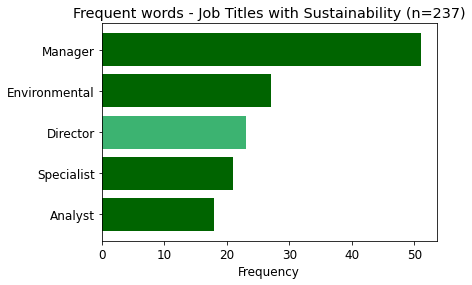

In [21]:
#Graphing the frequent words seen in job titles with sustainability
x = [word[0] for word in st_freq[:5]]
y = [word[1] for word in st_freq[:5]]

ct_colors = ['darkgreen' if x in sdt_freq else 'mediumseagreen' for x in st_freq_w]
plt.rcParams.update({'font.size': 12})
plt.title("Frequent words - Job Titles with Sustainability (n=237)")
plt.barh(x, y, color = ct_colors)
plt.gca().invert_yaxis()
plt.gca().set_xlabel('Frequency')

plt.show()


In [22]:
#Creating column with edited job description
load_data['job_desc_edit'] = [re.sub(r'\n', ' ', str(x)).strip().lower() for x in load_data['job_descriptions']]
load_data

,job_title,location,job_key,job_descriptions,company_name,ceo,founded,size,revenue,industry,job_title_edit,sust_title,location_edit,sust_desc,size_category,rev_category,job_desc_edit
0,Sustainability Intern,Remote,f5438de8a8e1629a,About Imperfect\nImperfect Foods was founded i...,Imperfect Foods,Philip Behn,2015,"1001 to 5,000",less than $1M (USD),Manufacturing,Sustainability Intern,Yes,Remote,Yes,large,Less than \$1M,about imperfect imperfect foods was founded in...
1,Environmental Sustainability Internship,"Providence, RI",7075a3a7b5571059,About: Jellyfish is a newly founded venture t...,Jellyfish,-1,2005,51 to 200,$5M to $25M (USD),Restaurants & Food Service,Environmental Sustainability Internship,Yes,RI,Yes,medium,\$1M to \$100M,about: jellyfish is a newly founded venture t...
2,SUSTAINABILITY ANALYST,"Austin, TX",2171570f88a3a65d,"Austin, USA\nLongevity Partners is a boutique ...",Longevity Partners,-1,-1,11 to 50,-1,-1,Sustainability Analyst,Yes,TX,Yes,small,n/a,"austin, usa longevity partners is a boutique s..."
3,Sustainability Innovation Consultant,Remote,e862369e52ce2651,"7+ years of experience in consulting, solution...","Amazon Web Services, Inc.",-1,-1,-1,-1,Information Technology,Sustainability Innovation Consultant,Yes,Remote,Yes,n/a,n/a,"7+ years of experience in consulting, solution..."
4,Sustainability Associate,"Louisville, KY",00a0e465fe8342c8,Schneider Electric™ creates connected technolo...,Schneider Electric,Jean-Pascal Tricoire,-1,"more than 10,000",more than $10B (USD),"Energy, Mining & Utilities",Sustainability Associate,Yes,KY,Yes,very large,More than \$10B,schneider electric™ creates connected technolo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Staff Sustainability Strategy & Disclosure Con...,"Washington, DC 20036 (Downtown area)",037f3323b9192c81,ERM is seeking a motivated and dynamic Sustain...,Erm Group,-1,1971,"1001 to 5,000",$100M to $500M (USD),HR Consulting,Staff Sustainability Strategy & Disclosure Con...,Yes,DC,Yes,large,\$100M to \$1B,erm is seeking a motivated and dynamic sustain...
669,ESG and Sustainability Manager,"Denver, CO",cf4d4f9e0009297a,"Discover your full potential. At Tetra Tech, w...",Tetra Tech,Dan L. Batrack,1966,"more than 10,000",$1B to $5B (USD),Architectural & Engineering Services,Esg And Sustainability Manager,Yes,CO,Yes,very large,\$1B to \$10B,"discover your full potential. at tetra tech, w..."
670,"Manager, Sustainability","Omaha, NE",cc7e05bf63d6cb1d,Department FMP-Administration 50000761 Busines...,University Of Nebraska Medical Center,-1,1995,"5,001 to 10,000",$100M to $500M (USD),Education,"Manager, Sustainability",Yes,NE,Yes,very large,\$100M to \$1B,department fmp-administration 50000761 busines...
671,"Associate Consultant, Sustainability & Social ...","New York, NY 10010 (Flatiron District area)",cf188c93641c2e26,APCO Impact is a unique consultancy that takes...,Apco Worldwide,-1,1984,"501 to 1,000",$25M to $100M (USD),Media & Communication,"Associate Consultant, Sustainability & Social ...",Yes,NY,Yes,large,\$1M to \$100M,apco impact is a unique consultancy that takes...


In [23]:
#Creating column to indicate whether it has the words "Environmental", "Specialist", "Analyst", "Manager"
load_data['environmental'] = ['Yes' if "environmental" in x.lower() else 'No' for x in load_data['job_title']]
load_data['specialist'] = ['Yes' if "specialist" in x.lower() else 'No' for x in load_data['job_title']]
load_data['analyst'] = ['Yes' if "analyst" in x.lower() else 'No' for x in load_data['job_title']]
load_data['manager'] = ['Yes' if "manager" in x.lower() else 'No' for x in load_data['job_title']]
load_data['engineer'] = ['Yes' if "engineer" in x.lower() else 'No' for x in load_data['job_title']]
load_data

,job_title,location,job_key,job_descriptions,company_name,ceo,founded,size,revenue,industry,...,location_edit,sust_desc,size_category,rev_category,job_desc_edit,environmental,specialist,analyst,manager,engineer
0,Sustainability Intern,Remote,f5438de8a8e1629a,About Imperfect\nImperfect Foods was founded i...,Imperfect Foods,Philip Behn,2015,"1001 to 5,000",less than $1M (USD),Manufacturing,...,Remote,Yes,large,Less than \$1M,about imperfect imperfect foods was founded in...,No,No,No,No,No
1,Environmental Sustainability Internship,"Providence, RI",7075a3a7b5571059,About: Jellyfish is a newly founded venture t...,Jellyfish,-1,2005,51 to 200,$5M to $25M (USD),Restaurants & Food Service,...,RI,Yes,medium,\$1M to \$100M,about: jellyfish is a newly founded venture t...,Yes,No,No,No,No
2,SUSTAINABILITY ANALYST,"Austin, TX",2171570f88a3a65d,"Austin, USA\nLongevity Partners is a boutique ...",Longevity Partners,-1,-1,11 to 50,-1,-1,...,TX,Yes,small,n/a,"austin, usa longevity partners is a boutique s...",No,No,Yes,No,No
3,Sustainability Innovation Consultant,Remote,e862369e52ce2651,"7+ years of experience in consulting, solution...","Amazon Web Services, Inc.",-1,-1,-1,-1,Information Technology,...,Remote,Yes,n/a,n/a,"7+ years of experience in consulting, solution...",No,No,No,No,No
4,Sustainability Associate,"Louisville, KY",00a0e465fe8342c8,Schneider Electric™ creates connected technolo...,Schneider Electric,Jean-Pascal Tricoire,-1,"more than 10,000",more than $10B (USD),"Energy, Mining & Utilities",...,KY,Yes,very large,More than \$10B,schneider electric™ creates connected technolo...,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Staff Sustainability Strategy & Disclosure Con...,"Washington, DC 20036 (Downtown area)",037f3323b9192c81,ERM is seeking a motivated and dynamic Sustain...,Erm Group,-1,1971,"1001 to 5,000",$100M to $500M (USD),HR Consulting,...,DC,Yes,large,\$100M to \$1B,erm is seeking a motivated and dynamic sustain...,No,No,No,No,No
669,ESG and Sustainability Manager,"Denver, CO",cf4d4f9e0009297a,"Discover your full potential. At Tetra Tech, w...",Tetra Tech,Dan L. Batrack,1966,"more than 10,000",$1B to $5B (USD),Architectural & Engineering Services,...,CO,Yes,very large,\$1B to \$10B,"discover your full potential. at tetra tech, w...",No,No,No,Yes,No
670,"Manager, Sustainability","Omaha, NE",cc7e05bf63d6cb1d,Department FMP-Administration 50000761 Busines...,University Of Nebraska Medical Center,-1,1995,"5,001 to 10,000",$100M to $500M (USD),Education,...,NE,Yes,very large,\$100M to \$1B,department fmp-administration 50000761 busines...,No,No,No,Yes,No
671,"Associate Consultant, Sustainability & Social ...","New York, NY 10010 (Flatiron District area)",cf188c93641c2e26,APCO Impact is a unique consultancy that takes...,Apco Worldwide,-1,1984,"501 to 1,000",$25M to $100M (USD),Media & Communication,...,NY,Yes,large,\$1M to \$100M,apco impact is a unique consultancy that takes...,No,No,No,No,No


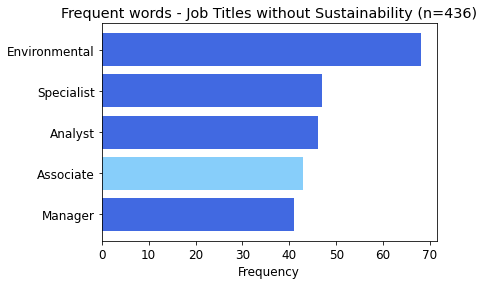

In [24]:
#Graphing the frequent words seen in job titles without sustainability
x = [word[0] for word in sd_freq[:5]]
y = [word[1] for word in sd_freq[:5]]

cd_colors = ['royalblue' if x in sdt_freq else 'lightskyblue' for x in sd_freq_w]

plt.rcParams.update({'font.size': 12})
plt.title("Frequent words - Job Titles without Sustainability (n=436)")
plt.barh(x, y, color = cd_colors)
plt.gca().invert_yaxis()
plt.gca().set_xlabel('Frequency')

plt.show()



Number of rows included in analysis: 44
Most frequent words for jobs WITHOUT sustainability in them: 
[('Environmental', 44), ('Specialist', 28), ('Analyst', 14), ('Scientist', 5), ('Protection', 4), ('Health', 4), ('Wetland', 3), ('Historic', 3), ('Preservation', 3), ('Ii', 3)]


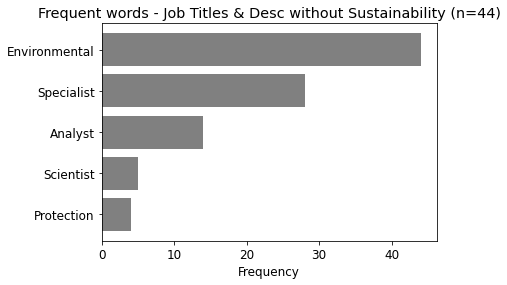

In [26]:
#Graphing the frequent words seen in jobs where 'sustainability' did not show up in title or description
s = load_data[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No')]['job_title_edit']
ndt_freq = frequent_words(s, notWords = [' ', 'entry', 'level'])

print(f'Most frequent words for jobs WITHOUT sustainability in them: \n{ndt_freq}')

x = [word[0] for word in ndt_freq[:5]]
y = [word[1] for word in ndt_freq[:5]]

plt.title("Frequent words - Job Titles & Desc without Sustainability (n=44)")
plt.barh(x, y, color = 'gray')
plt.gca().invert_yaxis()
plt.gca().set_xlabel('Frequency')

plt.show()

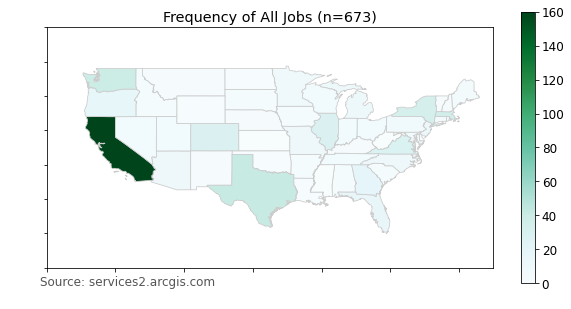

In [122]:
# Map Guide - https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

#"sustainability" job titles, where are they located?
# Map Sourc: https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e_0?geometry=136.684%2C29.346%2C-21.871%2C67.392
fp = ".\states-shapes\States_shapefile.shp"

map_df = gpd.read_file(fp)
map_df.drop('Program', axis=1, inplace= True)
map_df.drop('State_Name', axis=1, inplace=True)
map_df.rename(columns = {'State_Code':'location_edit'}, inplace=True)


#df is groupby location_edit (states) and count
df = load_data.loc[:,['company_name','location_edit']].groupby('location_edit').count()

merged = map_df.join(df, on = 'location_edit', how = 'left')
merged.loc[:,'company_name'] = merged.loc[:,'company_name'].replace(np.nan, 0)
merged[0:8]

variable = 'company_name'

cmin, cmax = 0, 160

fig, ax = plt.subplots(1, figsize = (10,5))
merged.plot(column=variable, cmap='BuGn', linewidth = 0.8, ax = ax, edgecolor = '0.8')

ax.set_title('Frequency of All Jobs (n=673)')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylim(20,55)
ax.set_xlim(-130,-65)
ax.annotate('Source: services2.arcgis.com', xy=(0.07,0.11), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment = 'top', color = '#555555')

#colorbar as a legend
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=cmin, vmax=cmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


In [30]:
df = load_data.loc[:,['company_name','location_edit']].groupby('location_edit').count().sort_values('company_name', ascending = False)
df[:12]


,company_name
location_edit,
CA,151
TX,40
WA,38
MA,34
NY,32
DC,30
IL,27
CO,27
Remote,27


In [31]:
#categorizing jobs by industry. indeed has 62 industries. 137 jobs are n/a.
load_data['industry'].unique()
#jobs with sustainability in the title
print('Jobs with Sustainability in Title')
print(load_data.loc[load_data['sust_title'] == 'Yes',['industry','location_edit']].groupby(['industry']).count().sort_values(by="location_edit",ascending=False)[:4])
#jobs with sustainability NOT in the title - is 'sustainability' the right word to search?
print('\nJobs without Sustainability in Title')
print(load_data.loc[load_data['sust_title'] == 'No',['industry','location_edit']].groupby(['industry']).count().sort_values(by="location_edit",ascending=False)[:4])
#all jobs that show up when we search 'sustainability' on indeed
print('\nall jobs')
print(load_data.loc[:,['industry','location_edit']].groupby(['industry'], as_index= False).count().sort_values(by="location_edit",ascending=False)[:4])

n_groups = 3

Jobs with Sustainability in Title
                        location_edit
industry                             
-1                                 47
Manufacturing                      30
Healthcare                         18
Information Technology             17

Jobs without Sustainability in Title
                    location_edit
industry                         
-1                             90
Manufacturing                  51
Retail & Wholesale             34
Education                      32

all jobs
                              industry  location_edit
0                                   -1            137
42                       Manufacturing             81
25                           Education             44
33  Government & Public Administration             43


<ipython-input-133-ec41a21913d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_alljobs['industry'][33] = 'Government'


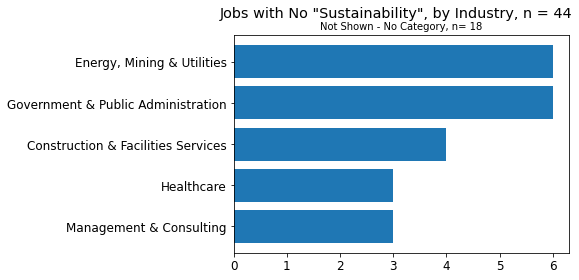

In [133]:
#bar chart for industry, all jobs
ind_alljobs = (load_data.loc[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No'),['industry','location_edit']].groupby(['industry'], as_index= False).count().sort_values(by="location_edit",ascending=False))
ind_alljobs['industry'][33] = 'Government'
group = ind_alljobs['industry'][1:6]
height = ind_alljobs['location_edit'][1:6]

# ax = fig.add_axes([0,0,1,1])
plt.suptitle('Jobs with No "Sustainability", by Industry, n = 44')
plt.title('Not Shown - No Category, n= 18', fontsize = 10)
plt.barh(group,height)
plt.gca().invert_yaxis()
plt.show()

In [129]:
load_data.loc[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No'),['location_edit', 'company_name']].groupby(['company_name']).count().sort_values(by="location_edit",ascending=False)[:30]

,location_edit
company_name,
Rinker Design Associates,3
Hamer Environmental,2
Burns & Mcdonnell,2
Us Surface Transportation Board,2
Cvs Health,2
"Eastern Research Group, Inc.",2
Jacobs,2
Seeml,1
Southern Nevada Health District,1


In [143]:
load_data.loc[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No') & (load_data['company_name'] == 'Cvs Health')]['job_descriptions'][500]

"Primary responsibilities of the Environmental Analyst, Senior include managing the development and implementation of environmental regulatory compliance programs for CVS Health facilities across the enterprise. The Senior Consultant will specifically manage environmental permitting and reporting projects by independently collaborating with business partners, regulatory agencies, outside consultants and internal Environmental Department staff. These programs include: EPCRA Tier II Hazardous Material Inventory reporting, hazardous waste reporting, in-store drug take back kiosk permitting, Distribution Center stormwater permitting, annual air emission reporting/permit renewals, storage tank financial assurance obligations, tank permitting/renewals and Pollution Prevention Plan reporting. The Senior Consultant will use project management skills to ensure that these obligations are completed to the highest quality level possible within regulatory mandated deadlines.\n\n\nThe Senior Consult

In [24]:
#categorizing jobs by employee size
load_data['size_category'].unique()
#jobs with sustainability in the title
print('Jobs with Sustainability in Title')
print(load_data.loc[load_data['sust_title'] == 'Yes',['size_category','industry']].groupby(['size_category']).count().sort_values(by="industry",ascending=False)[:10])
# #jobs with sustainability NOT in the title - is 'sustainability' the right word to search?
print('\nJobs without Sustainability in Title')
print(load_data.loc[load_data['sust_title'] == 'No',['size_category','industry']].groupby(['size_category']).count().sort_values(by="industry",ascending=False)[:10])
# #all jobs that show up when we search 'sustainability' on indeed
print('\nall jobs')
print(load_data.loc[:,['size_category','industry']].groupby(['size_category']).count().sort_values(by="industry",ascending=False)[:10])

Jobs with Sustainability in Title
               industry
size_category          
very large           98
large                61
n/a                  41
small                18
medium               15
very small            4

Jobs without Sustainability in Title
               industry
size_category          
very large          180
n/a                 107
large                70
medium               46
small                18
very small           15

all jobs
               industry
size_category          
very large          278
n/a                 148
large               131
medium               61
small                36
very small           19


In [25]:
#categorizing jobs by revenue.
load_data['rev_category'].unique()
# jobs with sustainability in the title
print('Jobs with Sustainability in Title')
print(load_data.loc[load_data['sust_title'] == 'Yes',['rev_category','industry']].groupby(['rev_category']).count().sort_values(by="industry",ascending=False)[:10])
# #jobs with sustainability NOT in the title - is 'sustainability' the right word to search?
print('\nJobs without Sustainability in Title')
print(load_data.loc[load_data['sust_title'] == 'No',['rev_category','industry']].groupby(['rev_category']).count().sort_values(by="industry",ascending=False)[:10])
# #all jobs that show up when we search 'sustainability' on indeed
print('\nall jobs')
print(load_data.loc[:,['rev_category','industry']].groupby(['rev_category']).count().sort_values(by="industry",ascending=False)[:10])


Jobs with Sustainability in Title
                 industry
rev_category             
n/a                    66
More than \$10B        57
\$1B to \$10B          42
\$100M to \$1B         38
\$1M to \$100M         27
Less than \$1M          7

Jobs without Sustainability in Title
                 industry
rev_category             
n/a                   162
More than \$10B        98
\$1B to \$10B          68
\$1M to \$100M         59
\$100M to \$1B         35
Less than \$1M         14

all jobs
                 industry
rev_category             
n/a                   228
More than \$10B       155
\$1B to \$10B         110
\$1M to \$100M         86
\$100M to \$1B         73
Less than \$1M         21


### Creating Word Clouds - frequent words

In [75]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [117]:
# DEFINE THE DATAFRAME YOU WANT TO ANALYZE HERE
desc_df = load_data.loc[(load_data['sust_title'] == 'No') & (load_data['sust_desc'] == 'No')]
desc_df.reset_index(inplace=True)

# SPECIFY THE SERIES YOU WANT IN THE WORD CLOUD
descriptions = desc_df['job_descriptions']
desc_df.head()

,index,job_title,location,job_key,job_descriptions,company_name,ceo,founded,size,revenue,...,location_edit,sust_desc,size_category,rev_category,job_desc_edit,environmental,specialist,analyst,manager,engineer
0,5,Environmental Protection Specialist,"Washington, DC 20505 (Foggy Bottom area)",77d2cc7befc9e0ac,Environmental Protection Specialists support t...,Central Intelligence Agency,David Cohen,1947,"more than 10,000",-1,...,DC,No,very large,n/a,environmental protection specialists support t...,Yes,Yes,No,No,No
1,26,ENVIRONMENTAL HEALTH SPECIALIST,"Durham, NC 27701",aca7216abae9a4be,Durham County Government employs approximately...,Durham County,-1,-1,51 to 200,$1M to $5M (USD),...,NC,No,medium,\$1M to \$100M,durham county government employs approximately...,Yes,Yes,No,No,No
2,93,"Economic Analyst - Environmental (Austin, TX)","Austin, TX",32bb55f4146143c7,Description\nWe have an opening for an Environ...,Burns & Mcdonnell,-1,1898,"5,001 to 10,000",$1B to $5B (USD),...,TX,No,very large,\$1B to \$10B,description we have an opening for an environm...,Yes,No,Yes,No,No
3,102,Environmental Protection Specialist,"Washington, DC",0d072daade43f6ab,Duties\nSummary\nThe individual serves as an E...,Us Surface Transportation Board,-1,-1,-1,-1,...,DC,No,n/a,n/a,duties summary the individual serves as an env...,Yes,Yes,No,No,No
4,124,Environmental Analyst,"Washington, DC",807ecbb8599858b8,"ERG has an immediate opening for a bright, mot...","Eastern Research Group, Inc.",-1,-1,-1,-1,...,DC,No,n/a,n/a,"erg has an immediate opening for a bright, mot...",Yes,No,Yes,No,No


In [77]:
# function to filter out unwanted words, stop_words, puntuation

def punctuation_stop(text, unwanted):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    unimportant = unwanted
    for w in word_tokens:
        if w not in stop_words and w.isalpha() and w not in unimportant:
            filtered.append(w.lower())
    return filtered

In [78]:
# generate words for word cloud
# input: series

def forWC(series, unwanted):
    # list of descriptions for each job of interest
    processed_descriptions = []
    for i in range(0, len(descriptions)):
        #Remove all \n
        processed_desc = re.sub(r'\n', ' ', str(descriptions[i]))

        processed_desc = processed_desc.lower()

        processed_descriptions.append(processed_desc)
    
    # preparing the descriptions list for filtering
    words = " ".join(processed_descriptions)
    words_filtered = punctuation_stop(words, unwanted)
    
    # preparing the filtered description for WordCloud
    text = " ".join([ele for ele in words_filtered])
    
    return text

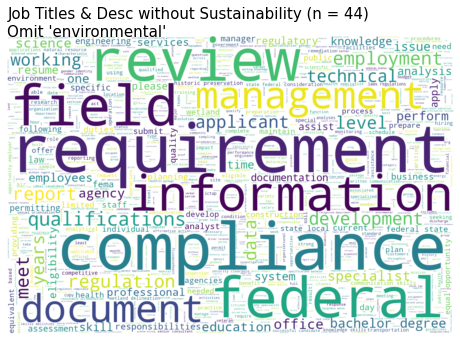

In [120]:
# DEFINE unwanted words here
# used for sust title yes vs no, environmental
# unwanted = [
#     'people', 'team', 'customer', 'client', 
#     'support', 'product', 'projects', 'programs', 
#     'ensure', 'required', 'goal', 'service', 'program', 
#     'provide', 'including', 'company', 'work', 'position', 
#     'employee', 'project', 'experience', 'sustainability', 
#     'provide', 'within', 'well', 'application', 'include', 
#     'industry', 'year', 'ability', 'new', 'part', 'preferred', 'related',
#     'use', 'job', 'must', 'qualification', "environmental", 'regards',
#     'business', 'development', 'management'
# ]

# user for neither analysis
unwanted = [
        'people', 'team', 'customer', 'client', 
        'support', 'product', 'projects', 'programs', 
        'ensure', 'required', 'goal', 'service', 'program', 
        'provide', 'including', 'company', 'work', 'position', 
        'employee', 'project', 'experience', 'sustainability', 
        'provide', 'within', 'well', 'application', 'include', 'may',
        'industry', 'year', 'ability', 'new', 'part', 'preferred', 'related',
        'use', 'job', 'must', 'qualification', 'experience', 'environmental'
]

#used for manager sust title yes vs no
# unwanted = [
#     'people', 'team', 'customer', 'client', 
#     'support', 'product', 'projects', 'programs', 
#     'ensure', 'required', 'goal', 'service', 'program', 
#     'provide', 'including', 'company', 'work', 'position', 
#     'employee', 'project', 'experience', 'sustainability', 
#     'provide', 'within', 'well', 'application', 'include', 
#     'industry', 'year', 'ability', 'new', 'part', 'preferred', 'related',
#     'use', 'job', 'must', 'qualification', 'regards',
#     'manager', 'manage', 'management', 'development', 'business', 'across'
# ]

# used for specialist, analyst
# unwanted = [
#     'people', 'team', 'customer', 'client', 
#     'support', 'product', 'projects', 'programs', 
#     'ensure', 'required', 'goal', 'service', 'program', 
#     'provide', 'including', 'company', 'work', 'position', 
#     'employee', 'project', 'experience', 'sustainability', 
#     'provide', 'within', 'well', 'application', 'include', 
#     'industry', 'year', 'ability', 'new', 'part', 'preferred', 'related',
#     'use', 'job', 'must', 'qualification', 'regards',
#     'business', 'development', 'management'
# ]

words = forWC(descriptions, unwanted)

#Creating wordcloud generator
wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =1500, height = 1000)

#Actually creating the wordcloud
wc.generate(words)

#MODIFY title and file name here
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.text(x = 0.5, y = 0.5, s = "Job Titles & Desc without Sustainability (n = 44)\nOmit 'environmental'", fontsize = 15)
plt.savefig('freqwords_no_no_env.jpg')
plt.show()
